In [235]:
#Observations

#1.Cities located between the -20 and 20 degrees latitude band have the highest temperatures. Temperatures decrease as cities 
#  move away from this band on either side. 

#2.Cloudiness and humidity are evenly distributed across the latitude. Majority of the cities have greater than 
# 50% of the humidity.

#4.About 80% of the cities have wind speeds below 20 mph, and there is no clear trend between wind speed and latitude.

In [236]:
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import openweathermapy.core as owm
from citipy import citipy
from datetime import datetime

In [237]:
owmkey = "f23de46e6c0b3500090a3e67a71e4eb2"
settings =  {"units": "imperial", "APPID": owmkey}

In [247]:
cities = []
name = []
country = []
 
lat = np.random.uniform(low=-90, high=90, size=700)
lon = np.random.uniform(low=-180, high=180, size=700)

for lat,lon in zip(lat,lon):
    cities.append(citipy.nearest_city(lat,lon))

for city in cities:   
    name.append(city.city_name)
    country.append(city.country_code)
 
#locations = list(zip(name,country))

weather_dict = {"City": name, "Country": country} 
weather_pd = pd.DataFrame(weather_dict)

In [248]:
weather_data = []
data = []

for index, row in weather_pd.iterrows():
    try:
        location = f'{row["City"]},{row["Country"]}'
        weather_data = owm.get_current(location, **settings)
        views = {"summary": ["name","sys.country","clouds.all","dt","main.humidity","coord.lat","coord.lon","main.temp_max",
                             "wind.speed"]}
        data.append(weather_data.get_dict(views["summary"]))
    except Exception:
        #print(f'{row['City']},{row['Country']}not found')
        pass
        
weather_data_pd = pd.DataFrame(data)
weather_data_pd = weather_data_pd.rename(columns={"name":"City","clouds.all":"Cloudiness","sys.country":"Country",
                                               "dt":"Date","main.humidity":"Humidity","coord.lat":"Lat","coord.lon":"Lng",
                                               "main.temp_max":"Max Temp","wind.speed":"Wind Speed"})
weather_data_pd = weather_data_pd[["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]]  
weather_data_pd.to_csv("CityWeatherData.csv", index=False)
weather_data_pd.to_json("CityWeatherData.json")
weather_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,68,RU,1521435356,100,73.51,80.55,-9.47,22.39
1,Ilulissat,0,GL,1521431400,85,69.22,-51.10,19.40,4.70
2,Kahului,75,US,1521433080,94,20.89,-156.47,71.60,16.11
3,Moose Factory,75,CA,1521432240,83,51.26,-80.61,-7.61,4.70
4,Dikson,68,RU,1521435356,100,73.51,80.55,-9.47,22.39


In [250]:
sns.set()
raw_time = weather_data_pd.iloc[0,3]
date = time.strftime('%m/%d/%Y',time.gmtime(raw_time))

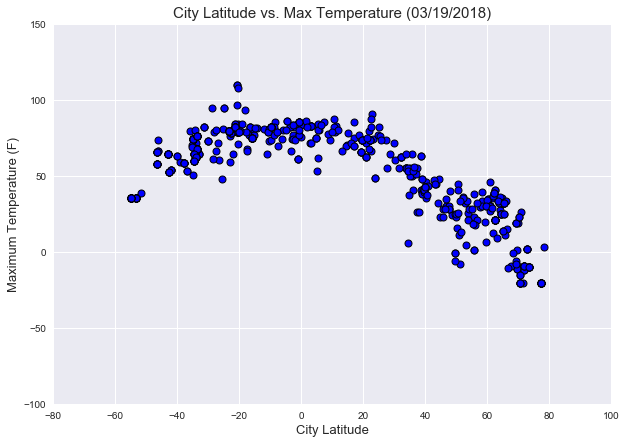

In [259]:
plt.figure(figsize=(10,7))
plt.xlim(-80,100)
plt.ylim(-100,150)
plt.grid(True)
plt.title(f'City Latitude vs. Max Temperature ({date})',fontsize=15)
plt.ylabel("Maximum Temperature (F)",fontsize=13)
plt.xlabel("City Latitude",fontsize=13)
plt.scatter(weather_data_pd["Lat"], weather_data_pd["Max Temp"], facecolors="blue", edgecolors="black", linewidth=1)
plt.savefig("MaximumTemperature.png")
plt.show()

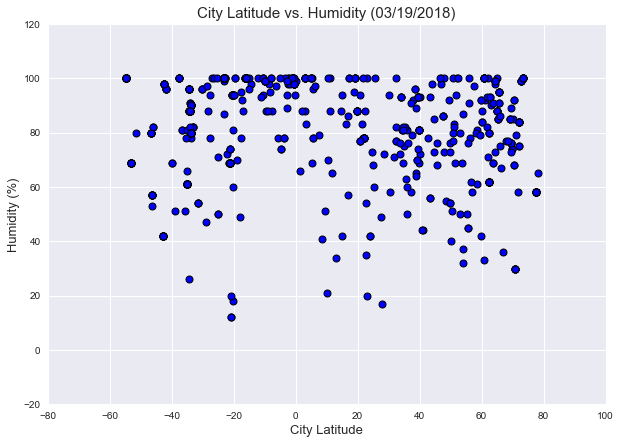

In [252]:
plt.figure(figsize=(10,7))
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid(True) 
plt.title(f'City Latitude vs. Humidity ({date})',fontsize=15)
plt.xlabel("City Latitude",fontsize=13)
plt.ylabel("Humidity (%)",fontsize=13)
plt.scatter(weather_data_pd["Lat"], weather_data_pd["Humidity"], facecolors="blue", edgecolors="black", linewidth=1)
plt.savefig("Humidity.png")
plt.show()

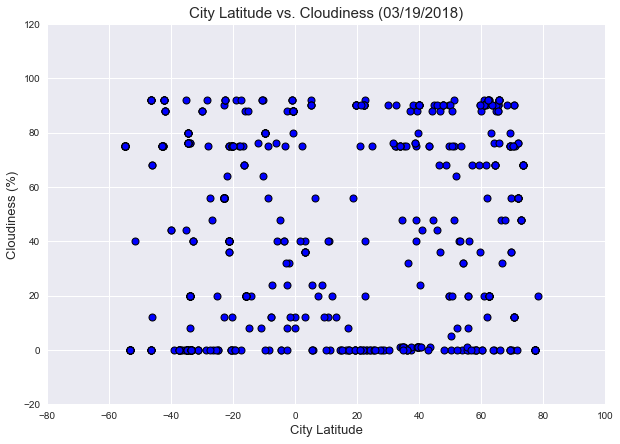

In [253]:
plt.figure(figsize=(10,7))
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid(True) 
plt.title(f'City Latitude vs. Cloudiness ({date})',fontsize=15)
plt.xlabel("City Latitude",fontsize=13)
plt.ylabel("Cloudiness (%)",fontsize=13)
plt.scatter(weather_data_pd["Lat"], weather_data_pd["Cloudiness"], facecolors="blue", edgecolors="black", linewidth=1)
plt.savefig("Cloudiness.png")
plt.show()

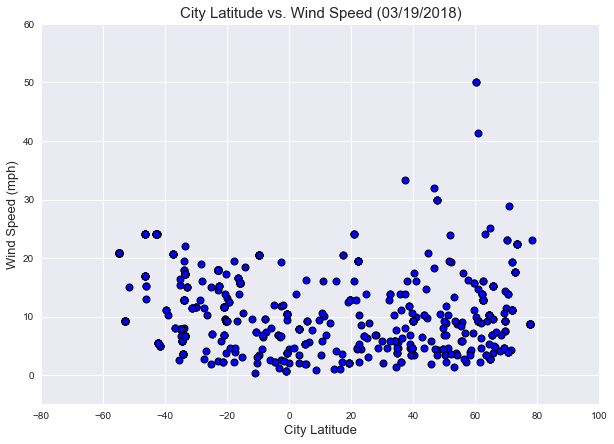

In [257]:
plt.figure(figsize=(10,7))
plt.xlim(-80,100)
plt.ylim(-5,60)
plt.grid(True) 
plt.title(f'City Latitude vs. Wind Speed ({date})', fontsize=15)
plt.xlabel("City Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph)", fontsize=13)
plt.scatter(weather_data_pd["Lat"], weather_data_pd["Wind Speed"], facecolors="blue", edgecolors="black", linewidth=1)
plt.savefig("Wind Speed.png")
plt.show()